16.172344689378757
15.0
18.547094188376754
17.5
21.04208416833667
20.0
23.627254509018037
22.5
26.422845691382765
25.0


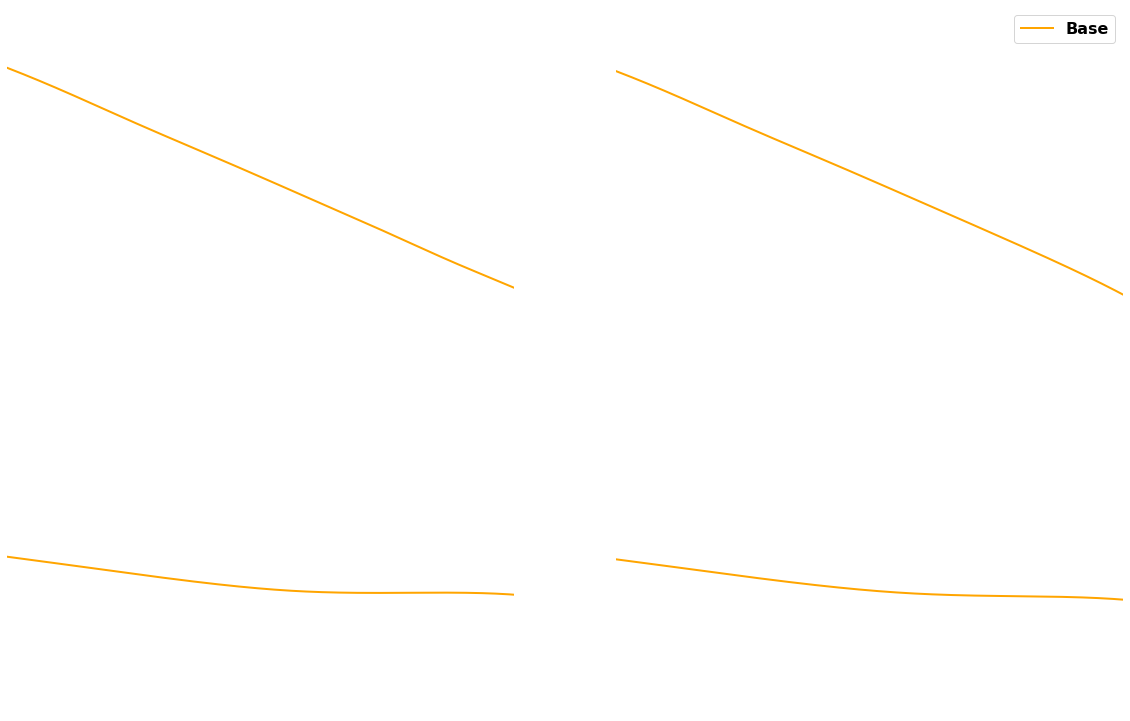

In [12]:
# load packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# modify global setting
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.family'] = 'Verdana'

from matplotlib.ticker import MultipleLocator,FormatStrFormatter,MaxNLocator


font = {'family' : 'sans-serif',
        'weight' : 'bold',
        'size'   : 16}

mpl.rc('font', **font)

fontname= 'Verdana'

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
import pandas as pd

from matplotlib import cm, colors
from mpl_toolkits.mplot3d import Axes3D
from scipy.special import sph_harm
import math



from scipy.interpolate import make_interp_spline

subt=1
fontsize_label=22



Vtkfile=pd.read_csv("h20_vs_MST_base.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_base=df1.to_numpy()




Vtkfile=pd.read_csv("h20_vs_MST_SM.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_SM=df1.to_numpy()


Vtkfile=pd.read_csv("h20_vs_MST_SM_faulted.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_SM_faulted=df1.to_numpy()



Vtkfile=pd.read_csv("h20_vs_MST_faulted.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_faulted=df1.to_numpy()

#####

Vtkfile=pd.read_csv("h20_vs_MST_WZ.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_WZ=df1.to_numpy()

###




R=1





y1=(h2_vs_MST_base)
y2 = (h2_vs_MST_SM)
y3=h2_vs_MST_SM_faulted
y4=h2_vs_MST_faulted
y5=h2_vs_MST_WZ

x=np.array([15, 17.5, 20, 22.5, 25,27.5, 30])
x=x/R


X_Y_Spline= make_interp_spline(x,y1,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y_=X_Y_Spline(X_)

fig, ax= plt.subplots(nrows=2, ncols=2,figsize=(20,13))

##First subplot


ax[0,0].yaxis.set_label_coords(-0.20,0.5)


#ax[0,0].plot(X_,Y_,   
#color='black' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)



X_Y_Spline2= make_interp_spline(x,y2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y2_=X_Y_Spline2(X_)

Y2_spec=Y2_

#ax[0,0].plot(X_,Y2_,   
#color='blue' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)



x1=np.array([15, 17.5, 20,22.5, 25,27.5, 30])
x1=x1/R



X_Y_Spline3= make_interp_spline(x1,y3,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y3_=X_Y_Spline3(X_)

Y3_spec=Y3_

#ax[0,0].plot(X_,Y3_,   
#color='red' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)


X_Y_Spline4= make_interp_spline(x1,y4,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y4_=X_Y_Spline4(X_)

Y4_spec=Y4_

#ax[0,0].plot(X_,Y4_,   
#color='green' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)




####


X_Y_Spline5= make_interp_spline(x1,y5,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y5_=X_Y_Spline5(X_)

Y5_spec=Y5_

ax[0,0].plot(X_,Y5_,   
color='orange' ,   # marker edge width
linestyle='-',            # line style will be dash line
linewidth=2)

##


#ax[0].legend(['Base','LTV','Faults + LTV','Faults'])

ax[0,0].set_ylim(3.5e-2,7.5e-2)
ax[0,0].set_xlim(15/R,30/R)
#plt.yticks(np.arange(min(Y_), max(Y_), 0.002))
ax[0,0].ticklabel_format(axis="y", style="sci",scilimits=(0,0))

#ax[0].set_xlabel('Mean Shell Thickness (km)',fontsize=14.0, fontweight='bold')
ax[0,0].set_ylabel('$h_{20}$',fontsize=fontsize_label, fontweight='bold',rotation=90,labelpad=100)
ax[0,0].yaxis.set_label_coords(-0.12,0.45)





MST_vals=[0/R,15/R,17.5/R,20/R,22.5/R,25/R,27.5/R,30/R]
MST_vals=MST_vals
no_vals=6
MST_err_LTV=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y2_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_LTV[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
  
    if MST_err_LTV[j]<0:
        MST_err_LTV[j]=0
    
            
MST_err_B=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y3_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_B[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    #print(MST_err_X)
    #print(MST_vals[j]) 
    if MST_err_B[j]<0:
        MST_err_B[j]=0
    
MST_err_F=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y4_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_F[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    if MST_err_F[j]<0:
        MST_err_F[j]=0
 


MST_err_Fs=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y5_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_Fs[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    if MST_err_Fs[j]<0:
        MST_err_Fs[j]=0
        
MST_err_F_h2=MST_err_F[1:no_vals-1]*subt
MST_err_B_h2=MST_err_B[1:no_vals-1]*subt
MST_err_LTV_h2=MST_err_LTV[1:no_vals-1]*subt
MST_err_Fs_h2=MST_err_Fs[1:no_vals-1]*subt




#ax[1].legend(['Base','LTV','Faults + LTV','Faults'])


#Y5_=Y2_+Y4_


#ax[1,0].plot(X_,Y5_,   
#color='black' ,   # marker edge width
#linestyle='--',            # line style will be dash line
#linewidth=2)



#ax[1,0].ticklabel_format(axis="y", style="sci",scilimits=(0,0))

ax[0,0].yaxis.set_label_coords(-0.14,0.45)

#ax.xaxis.set_minor_locator(MultipleLocator(0.1))




##Third subplot




Vtkfile=pd.read_csv("k20_vs_MST_base.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_base=df1.to_numpy()




Vtkfile=pd.read_csv("k20_vs_MST_SM.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_SM=df1.to_numpy()


Vtkfile=pd.read_csv("k20_vs_MST_SM_faulted.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_SM_faulted=df1.to_numpy()



Vtkfile=pd.read_csv("k20_vs_MST_faulted.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_faulted=df1.to_numpy()


Vtkfile=pd.read_csv("k20_vs_MST_WZ.txt", 
                          sep=" ",
                          index_col=False)
df1=Vtkfile
h2_vs_MST_WZ=df1.to_numpy()



y1=(h2_vs_MST_base)
y2 = (h2_vs_MST_SM)
y3=h2_vs_MST_SM_faulted
y4=h2_vs_MST_faulted
y5=h2_vs_MST_WZ





x=np.array([15, 17.5, 20, 22.5, 25,27.5, 30])
x=x/R


X_Y_Spline= make_interp_spline(x,y1,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y_=X_Y_Spline(X_)



ax[0,1].yaxis.set_label_coords(-0.20,0.5)


#ax[0,1].plot(X_,Y_,   
#color='black' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)



X_Y_Spline2= make_interp_spline(x,y2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y2_=X_Y_Spline2(X_)

Y2_spec=Y2_

#ax[0,1].plot(X_,Y2_,   
#color='blue' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)



x1=np.array([15, 17.5, 20,22.5, 25,27.5, 30])

x1=x1/R

X_Y_Spline3= make_interp_spline(x1,y3,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y3_=X_Y_Spline3(X_)

Y3_spec=Y3_

#ax[0,1].plot(X_,Y3_,   
#color='red' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)


X_Y_Spline4= make_interp_spline(x1,y4,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y4_=X_Y_Spline4(X_)

Y4_spec=Y4_

#ax[0,1].plot(X_,Y4_,   
#color='green' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)



X_Y_Spline5= make_interp_spline(x1,y5,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
Y5_=X_Y_Spline5(X_)

Y5_spec=Y5_

ax[0,1].plot(X_,Y5_,   
color='orange' ,   # marker edge width
linestyle='-',            # line style will be dash line
linewidth=2)




ax[0,1].legend(['Base','LTV','Faults + LTV','Faults','Faults + LTV + WZ'])

ax[0,1].set_ylim(0.8e-2,2.8e-2)
ax[0,1].set_xlim(15/R,30/R)
#plt.yticks(np.arange(min(Y_), max(Y_), 0.002))
ax[0,1].ticklabel_format(axis="y", style="sci",scilimits=(0,0))

#ax[0].set_xlabel('Mean Shell Thickness (km)',fontsize=14.0, fontweight='bold')
ax[0,1].set_ylabel('$k_{20}$',fontsize=fontsize_label, fontweight='bold',rotation=90,labelpad=10)
ax[0,1].yaxis.set_label_coords(-0.12,0.45)






MST_vals=[0/R,15/R,17.5/R,20/R,22.5/R,25/R,27.5/R,30/R]
MST_vals=MST_vals
no_vals=6
MST_err_LTV=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y2_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_LTV[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
  
    if MST_err_LTV[j]<0:
        MST_err_LTV[j]=0
    
            
MST_err_B=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y3_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_B[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    print(MST_err_X)
    print(MST_vals[j]) 
    if MST_err_B[j]<0:
        MST_err_B[j]=0
    
MST_err_F=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y4_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_F[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    if MST_err_F[j]<0:
        MST_err_F[j]=0
    
    
MST_err_Fs=np.zeros(no_vals)
for j in range(1,no_vals):
    MST_err_X=X_[np.argmin(np.abs((Y5_spec-Y_[int((j-1)*(Y_.shape[0]/no_vals))])))]
    MST_err_Fs[j]=(100*(MST_err_X-MST_vals[j])/(MST_vals[j]))
    if MST_err_Fs[j]<0:
        MST_err_Fs[j]=0
        
def append(arr):
    #arr=np.append(arr,arr[len(arr)-1])
    return arr
    
MST_err_F_k2=append(MST_err_F[1:no_vals-1]*subt)
MST_err_B_k2=append(MST_err_B[1:no_vals-1]*subt)
MST_err_LTV_k2=append(MST_err_LTV[1:no_vals-1]*subt)
MST_vals=append(MST_vals[1:no_vals-1])
MST_err_Fs_k2=append(MST_err_Fs[1:no_vals-1]*subt)










##Second Subplot



#Y5_=Y2_+Y4_


#ax[1,1].plot(X_,Y5_,   
#color='black' ,   # marker edge width
#linestyle='--',            # line style will be dash line
#linewidth=2)




#ax[1].legend(['Base','LTV','Faults + LTV','Faults'])


#ax[1,1].ticklabel_format(axis="y", style="sci",scilimits=(0,0))

ax[0,1].yaxis.set_label_coords(-0.11,0.45)

ax[0,1].yaxis.set_label_coords(-0.11,0.45)

ax[0,1].set_ylim(1.1e-2,2.8e-2)
ax[0,0].set_ylim(3.0e-2,7.8e-2)










X_Y_Spline2= make_interp_spline(MST_vals,MST_err_F_h2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
MST_err_F_h2=X_Y_Spline2(X_)



X_Y_Spline2= make_interp_spline(MST_vals,MST_err_B_h2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

MST_err_B_h2=X_Y_Spline2(X_)


X_Y_Spline2= make_interp_spline(MST_vals,MST_err_LTV_h2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
MST_err_LTV_h2=X_Y_Spline2(X_)



##

X_Y_Spline2= make_interp_spline(MST_vals,MST_err_Fs_h2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
MST_err_Fs_h2=X_Y_Spline2(X_)

##





X_Y_Spline2= make_interp_spline(MST_vals,MST_err_F_k2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
    
MST_err_F_k2=X_Y_Spline2(X_)



X_Y_Spline2= make_interp_spline(MST_vals,MST_err_B_k2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
MST_err_B_k2=X_Y_Spline2(X_)


X_Y_Spline2= make_interp_spline(MST_vals,MST_err_LTV_k2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)
MST_err_LTV_k2=X_Y_Spline2(X_)




##

X_Y_Spline2= make_interp_spline(MST_vals,MST_err_Fs_k2,bc_type="natural")
X_ = np.linspace(x.min(),x.max(),500)

    
MST_err_Fs_k2=X_Y_Spline2(X_)

##


for i in range(len(MST_err_F_k2)):
    MST_err_F_k2[i]=0.3


#ax[1,1].plot(X_,MST_err_F_k2,   
#color='green' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

#ax[1,1].plot(X_,MST_err_B_k2,   
#color='red' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

#ax[1,1].plot(X_,MST_err_LTV_k2,   
#color='blue' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

ax[1,1].plot(X_,MST_err_Fs_k2,   
color='orange' ,   # marker edge width
linestyle='-',            # line style will be dash line
linewidth=2)

ax[1,1].set_xscale('log')



for i in range(len(MST_err_F_h2)):
    MST_err_F_h2[i]=0.3
    
#ax[1,0].plot(X_,MST_err_F_h2,   
#color='green' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

#ax[1,0].plot(X_,MST_err_B_h2,   
#color='red' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

#ax[1,0].plot(X_,MST_err_LTV_h2,   
#color='blue' ,   # marker edge width
#linestyle='-',            # line style will be dash line
#linewidth=2)

ax[1,0].plot(X_,MST_err_Fs_h2,   
color='orange' ,   # marker edge width
linestyle='-',            # line style will be dash line
linewidth=2)




ax[1,1].set_xlim(15/R,25/R)
ax[1,1].set_ylim(0,8)



ax[1,0].set_xlabel('MEET (km)',fontsize=18.0, fontweight='bold')
ax[1,1].set_xlabel('MEET (km)',fontsize=18.0, fontweight='bold')

ax[1,0].set_xlim(15/R,25/R)
ax[1,0].set_ylim(0,8)





ax[1,0].set_ylabel('$\Delta$ %MET from $h_{20}$',fontsize=18.0, fontweight='bold',rotation=90)
ax[1,0].yaxis.set_label_coords(-0.08,0.45)

ax[1,1].set_ylabel('$\Delta$ %MET from $k_{20}$',fontsize=18.0, fontweight='bold',rotation=90)
ax[1,1].yaxis.set_label_coords(-0.08,0.45)

ax[0,0].yaxis.set_label_coords(-0.08,0.45)
ax[0,1].yaxis.set_label_coords(-0.1,0.45)




ax[0,0].yaxis.set_major_locator(MultipleLocator(1.5e-2))

ax[0,1].yaxis.set_major_locator(MultipleLocator(0.5e-2))


ax[0,0].set_xscale('log')
ax[0,1].set_xscale('log')
ax[1,0].set_xscale('log')
ax[1,1].set_xscale('log')
ax[0,0].set_xscale('log')

ax[0,0].set_yscale('log')
ax[0,1].set_yscale('log')
#ax[0,0].xaxis.set_major_locator(MultipleLocator(1.0e-2))
#ax[0,1].xaxis.set_major_locator(MultipleLocator(1.0e-2))
#ax[1,0].xaxis.set_major_locator(MultipleLocator(1.0e-2))
#ax[1,1].xaxis.set_major_locator(MultipleLocator(1.0e-2))

#ax[1,0].xaxis.set_major_locator(MultipleLocator(.05))


ax[0,0].tick_params(axis='x', which='major', pad=10)
ax[0,1].tick_params(axis='x', which='major', pad=10)
ax[1,0].tick_params(axis='x', which='major', pad=10)
ax[1,1].tick_params(axis='x', which='major', pad=10)

ax[0,0].set_ylim(3.0e-2,9.3e-2)
ax[0,1].set_ylim(1.1e-2,3.5e-2)

ax[1,0].set_ylim(0.0,25.0)
ax[1,1].set_ylim(0.0,25.0)

from matplotlib.ticker import FormatStrFormatter


ax[0,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[0,1].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1,1].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax[1,0].xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


ax[0,0].xaxis.set_major_locator(MultipleLocator(5.0e0))
ax[0,1].xaxis.set_major_locator(MultipleLocator(5.0e0))


ax[0,0].axis('off') 
ax[1,0].axis('off') 
ax[0,1].axis('off') 
ax[1,1].axis('off') 
#ax[2,0].axis('off') 
#ax[2,1].axis('off') 
#ax[0,0].axis('off') 
#ax[1,0].axis('off') 
#ax[0,1].axis('off') 
#ax[1,1].axis('off') 
#ax[2,0].axis('off') 
#ax[2,1].axis('off')




plt.savefig('Response_vs_MST_20.png', dpi=300)
